In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  # Missing import

In [9]:
# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/corrected_data_sequential_GW_fwd.xlsx'
df_fwd = pd.read_excel(file_path)

In [91]:
df_fwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        5414 non-null   object 
 1   position                    5414 non-null   object 
 2   team                        5414 non-null   object 
 3   xP                          5414 non-null   float64
 4   assists                     5414 non-null   int64  
 5   bonus                       5414 non-null   int64  
 6   bps                         5414 non-null   int64  
 7   clean_sheets                5414 non-null   int64  
 8   creativity                  5414 non-null   float64
 9   goals_conceded              5414 non-null   int64  
 10  goals_scored                5414 non-null   int64  
 11  ict_index                   5414 non-null   float64
 12  influence                   5414 non-null   float64
 13  kickoff_time                5414 

In [10]:
# Convert 'GW' column to object type (which is similar to string in pandas)
df_fwd['GW'] = df_fwd['GW'].astype('object')

C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syeds\AppData\Local\Temp\ipykernel_23092\2842143382.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\syed

ValueError: num must be an integer with 1 <= num <= 16, not 17

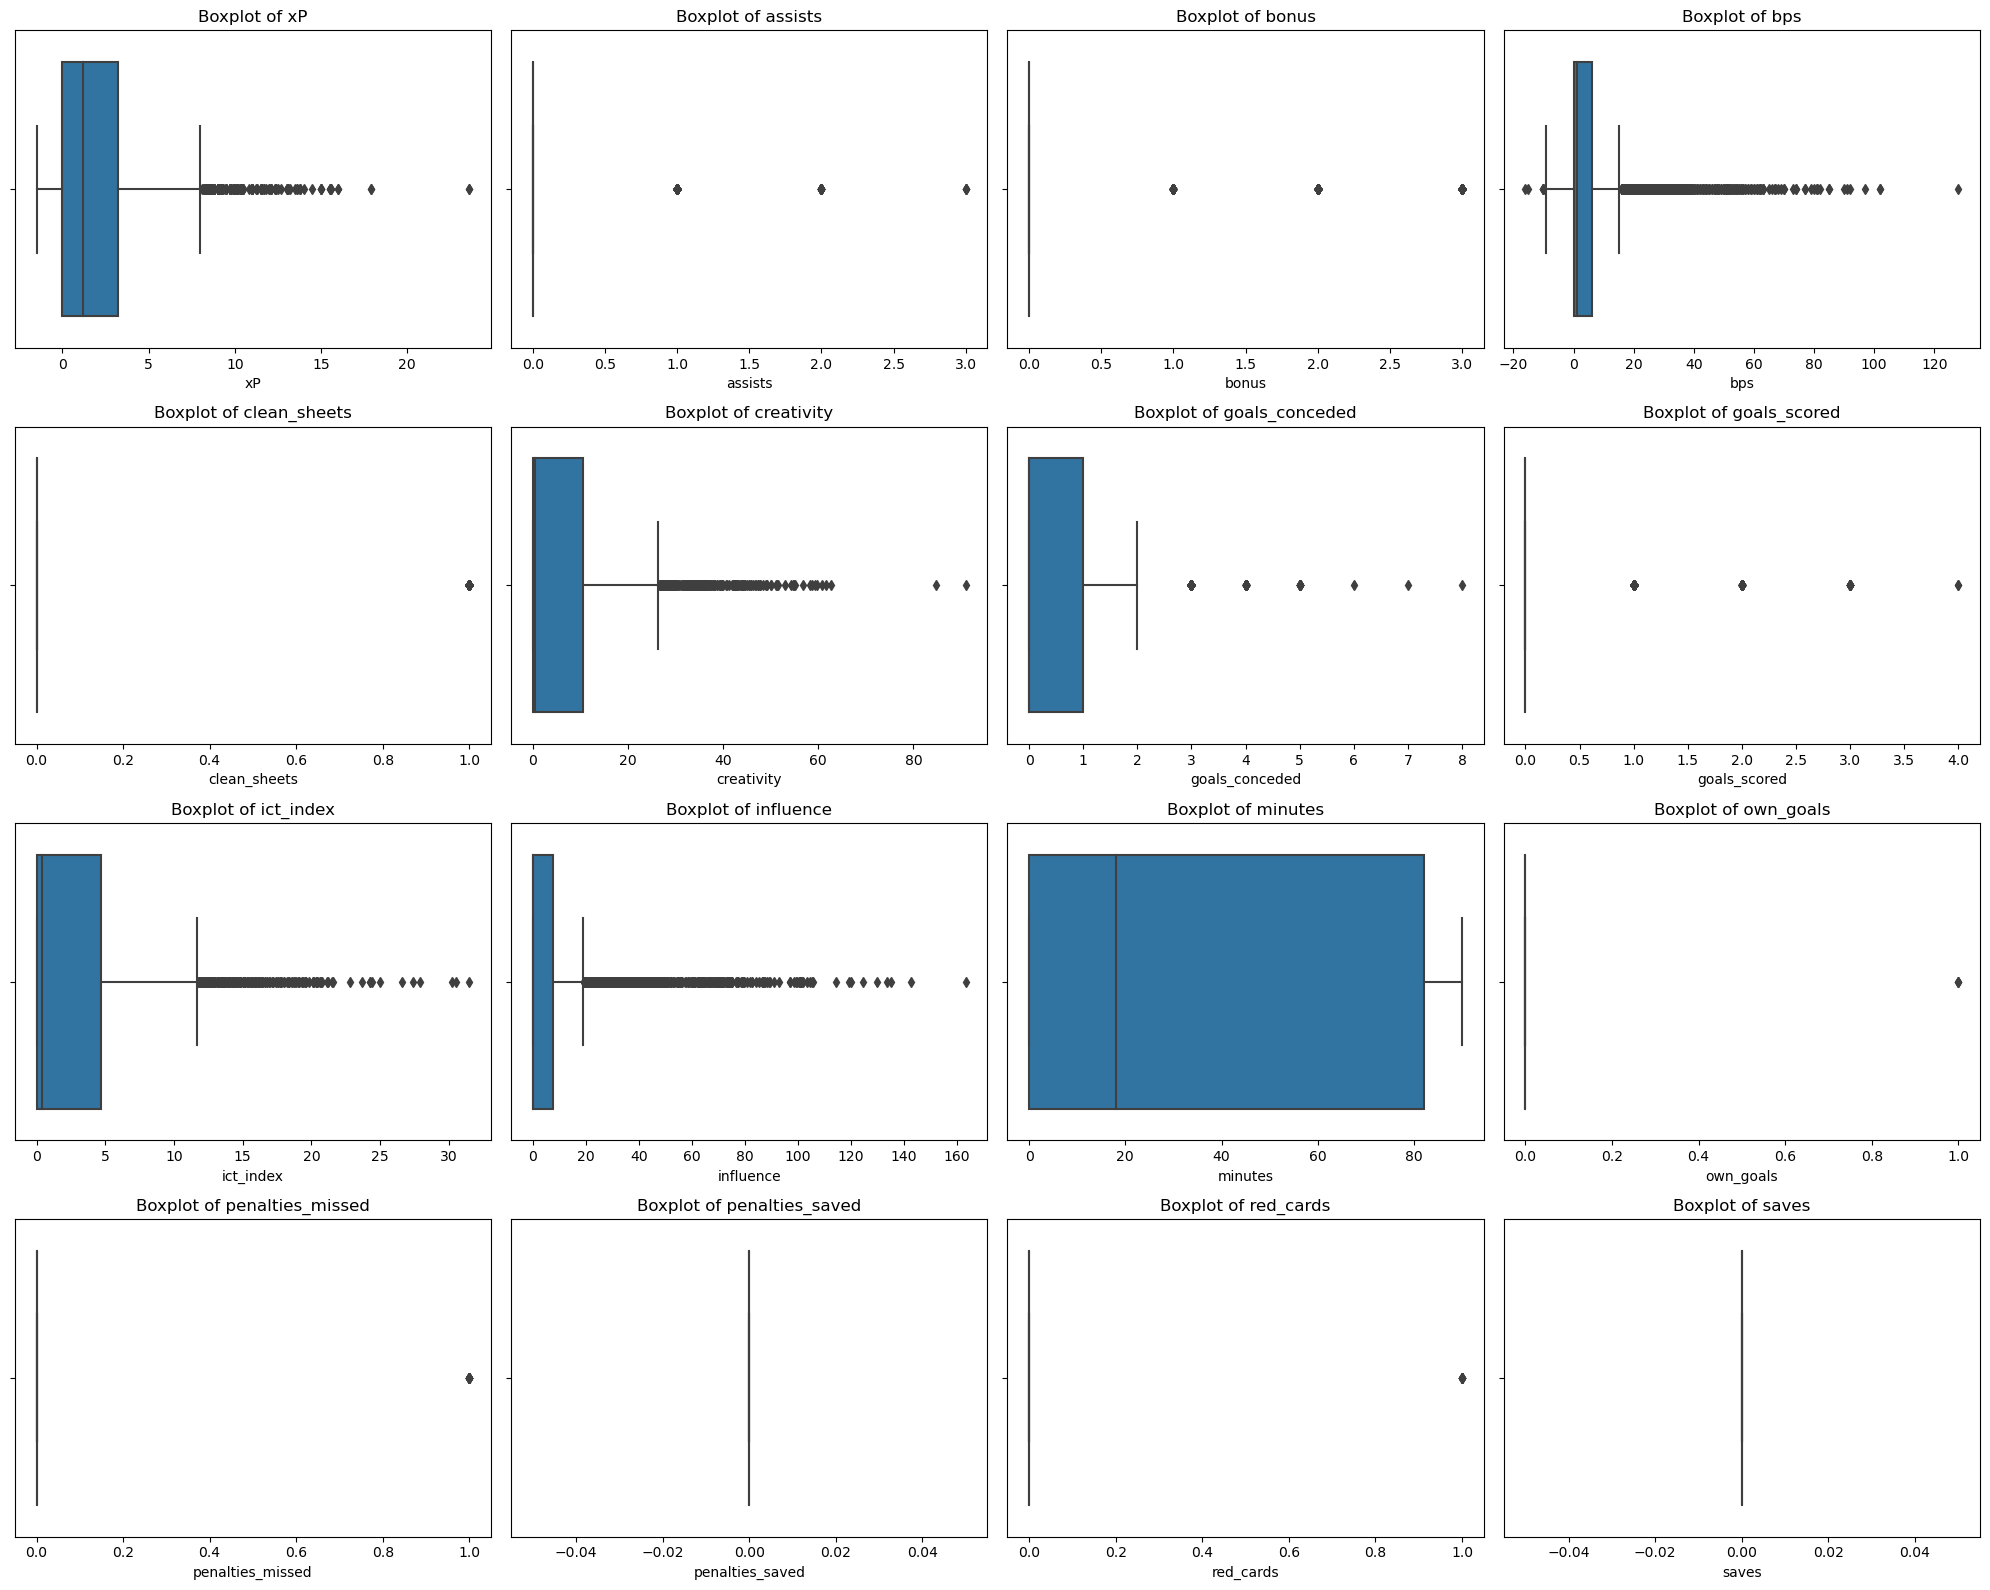

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the outliers in the Goalkeepers (GK) dataset
plt.figure(figsize=(20, 16))
numeric_columns_fwd = df_fwd.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each numeric feature
for i, col in enumerate(numeric_columns_fwd, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df_fwd.drop(columns=[ 'name', 'team', 'kickoff_time', 'position', 'season', 'opponent_team','GW','next_GW_total_points'])  # Drop non-numeric columns and target
y = df_fwd['next_GW_total_points']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Sort feature importance
sorted_indices = importances.argsort()[::-1]
important_features = [(features[i], importances[i]) for i in sorted_indices]

# Display feature importance
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")

minutes: 0.2139
selected: 0.0860
xP: 0.0643
transfers_balance: 0.0597
transfers_in: 0.0597
transfers_out: 0.0594
value: 0.0590
expected_goals_conceded: 0.0474
creativity: 0.0437
bps: 0.0329
ict_index: 0.0298
threat: 0.0290
expected_assists: 0.0282
influence: 0.0277
expected_goal_involvements: 0.0255
expected_goals: 0.0241
team_h_score: 0.0230
fixture_difficulty: 0.0223
team_a_score: 0.0186
goals_conceded: 0.0119
total_points: 0.0098
was_home: 0.0082
yellow_cards: 0.0042
clean_sheets: 0.0030
assists: 0.0029
bonus: 0.0027
goals_scored: 0.0013
starts: 0.0008
penalties_missed: 0.0007
red_cards: 0.0001
saves: 0.0000
penalties_saved: 0.0000
own_goals: 0.0000


In [13]:
# Exclude non-numeric columns
numeric_columns_fwd = df_fwd.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_fwd.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.419716
starts                        0.377005
xP                            0.365749
ict_index                     0.341209
threat                        0.320740
total_points                  0.314882
value                         0.283431
expected_goals_conceded       0.280982
selected                      0.279473
influence                     0.279414
bps                           0.271239
expected_goal_involvements    0.268061
creativity                    0.265907
expected_goals                0.247742
goals_conceded                0.239704
goals_scored                  0.219236
transfers_in                  0.217463
expected_assists              0.191142
bonus                         0.188123
clean_sheets                  0.174398
transfers_out                 0.157543
assists                       0.128751
yellow_cards                  0.103220
fixture_difficulty            0.087905
transfers_balance        

In [14]:
# Define the columns to drop
columns_to_drop = [
    'own_goals', 'red_cards','threat', 'creativity','saves','penalties_saved',
    'bonus','team_a_score','team_h_score','transfers_out','transfers_in','clean_sheets','goals_conceded'
]

# Drop the columns from the goalkeeper dataset
df_fwd_cleaned = df_fwd.drop(columns=columns_to_drop)

# Check the updated dataset
print(df_fwd_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        5414 non-null   object 
 1   position                    5414 non-null   object 
 2   team                        5414 non-null   object 
 3   xP                          5414 non-null   float64
 4   assists                     5414 non-null   int64  
 5   bps                         5414 non-null   int64  
 6   goals_scored                5414 non-null   int64  
 7   ict_index                   5414 non-null   float64
 8   influence                   5414 non-null   float64
 9   kickoff_time                5414 non-null   object 
 10  minutes                     5414 non-null   int64  
 11  opponent_team               5414 non-null   object 
 12  penalties_missed            5414 non-null   int64  
 13  selected                    5414 

In [15]:
# Exclude non-numeric columns
numeric_columns_fwd = df_fwd_cleaned.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_fwd.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.419716
starts                        0.377005
xP                            0.365749
ict_index                     0.341209
total_points                  0.314882
value                         0.283431
expected_goals_conceded       0.280982
selected                      0.279473
influence                     0.279414
bps                           0.271239
expected_goal_involvements    0.268061
expected_goals                0.247742
goals_scored                  0.219236
expected_assists              0.191142
assists                       0.128751
yellow_cards                  0.103220
fixture_difficulty            0.087905
transfers_balance             0.068161
penalties_missed              0.033154
Name: next_GW_total_points, dtype: float64


In [16]:
# Ensure that 'kickoff_time' is parsed as a datetime for time-series modeling
df_fwd_cleaned['kickoff_time'] = pd.to_datetime(df_fwd_cleaned['kickoff_time'])

# Check the new dataset
print(df_fwd_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        5414 non-null   object             
 1   position                    5414 non-null   object             
 2   team                        5414 non-null   object             
 3   xP                          5414 non-null   float64            
 4   assists                     5414 non-null   int64              
 5   bps                         5414 non-null   int64              
 6   goals_scored                5414 non-null   int64              
 7   ict_index                   5414 non-null   float64            
 8   influence                   5414 non-null   float64            
 9   kickoff_time                5414 non-null   datetime64[ns, UTC]
 10  minutes                     5414 non-null   int64           

In [17]:
# Sort data by player and gameweek
df_fwd_final = df_fwd_cleaned.sort_values(['name', 'GW'])

# List of features to compute rolling averages
features_to_roll = ['total_points', 'goals_scored','assists']

# Rolling averages for 10
for feature in features_to_roll:
    df_fwd_final[f'rolling_avg_{feature}_10gw'] = df_fwd_final.groupby('name')[feature].transform(lambda x: x.rolling(window=10, min_periods=1).mean())


# Check the new rolling averague columns
print(df_fwd_final.head())

             name position         team   xP  assists  bps  goals_scored  \
0  adam armstrong      FWD  Southampton  1.8        0   24             1   
1  adam armstrong      FWD  Southampton  3.5        0    0             0   
2  adam armstrong      FWD  Southampton  4.8        1   14             0   
3  adam armstrong      FWD  Southampton  2.5        0    6             0   
4  adam armstrong      FWD  Southampton  1.8        0    6             0   

   ict_index  influence              kickoff_time  ...  expected_assists  \
0        7.4       33.2 2021-08-14 14:00:00+00:00  ...          0.064000   
1        4.3        5.4 2021-08-22 13:00:00+00:00  ...          0.114000   
2        7.7        2.2 2021-08-28 14:00:00+00:00  ...          0.067804   
3        3.5        2.6 2021-09-11 14:00:00+00:00  ...          0.013770   
4        8.8       15.6 2021-09-18 14:00:00+00:00  ...          0.108000   

  expected_goal_involvements  expected_goals  expected_goals_conceded  starts  \
0    

In [18]:
# Select only numeric columns from the scaled dataframe
numeric_df_fwd = df_fwd_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_fwd.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                     xP   assists       bps  goals_scored  \
xP                             1.000000  0.291038  0.573148      0.496734   
assists                        0.291038  1.000000  0.397200      0.127225   
bps                            0.573148  0.397200  1.000000      0.918784   
goals_scored                   0.496734  0.127225  0.918784      1.000000   
ict_index                      0.622772  0.390395  0.812952      0.736263   
influence                      0.573626  0.369747  0.950846      0.913806   
minutes                        0.615297  0.269165  0.494968      0.372242   
penalties_missed               0.028702  0.029143 -0.000552      0.032279   
selected                       0.499691  0.156612  0.257826      0.239498   
total_points                   0.629083  0.479744  0.959150      0.881599   
transfers_balance              0.346760  0.053726  0.098725      0.086524   
value                          0.443718  0.154652  0.253

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical features for VIF calculation
X = df_fwd_final.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                          Feature        VIF
0                              xP   4.911633
1                         assists   6.275265
2                             bps  30.576777
3                    goals_scored  39.904630
4                       ict_index  15.618261
5                       influence  31.262237
6                         minutes  34.250474
7                penalties_missed   1.110658
8                        selected   2.199278
9                    total_points  65.677309
10              transfers_balance   1.226502
11                          value   3.849087
12                   yellow_cards   1.395934
13               expected_assists   5.396209
14     expected_goal_involvements  50.004306
15                 expected_goals  39.740715
16        expected_goals_conceded   2.983980
17                         starts  17.666536
18             fixture_difficulty   1.175493
19           next_GW_total_points   1.810633
20  rolling_avg_total_points_10gw  45.741818
21  rollin

In [20]:
# Dropping the chosen features
df_fwd_cleaned = df_fwd_final.drop(columns=['minutes','expected_goal_involvements','total_points','influence','goals_scored','assists'])

# Verifying the cleaned dataframe
print(df_fwd_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   name                           5414 non-null   object             
 1   position                       5414 non-null   object             
 2   team                           5414 non-null   object             
 3   xP                             5414 non-null   float64            
 4   bps                            5414 non-null   int64              
 5   ict_index                      5414 non-null   float64            
 6   kickoff_time                   5414 non-null   datetime64[ns, UTC]
 7   opponent_team                  5414 non-null   object             
 8   penalties_missed               5414 non-null   int64              
 9   selected                       5414 non-null   int64              
 10  transfers_balance       

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical features for VIF calculation
X = df_fwd_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                          Feature        VIF
0                              xP   4.778880
1                             bps   4.286186
2                       ict_index   8.161154
3                penalties_missed   1.044334
4                        selected   2.184767
5               transfers_balance   1.219908
6                           value   3.803601
7                    yellow_cards   1.127741
8                expected_assists   1.718800
9                  expected_goals   2.725766
10        expected_goals_conceded   2.669130
11                         starts   4.998465
12             fixture_difficulty   1.169181
13           next_GW_total_points   1.784035
14  rolling_avg_total_points_10gw  39.086150
15  rolling_avg_goals_scored_10gw  17.981073
16       rolling_avg_assists_10gw   4.150568


In [22]:
# Select only numeric columns from the scaled dataframe
numeric_df_fwd = df_fwd_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_fwd.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                     xP       bps  ict_index  \
xP                             1.000000  0.573148   0.622772   
bps                            0.573148  1.000000   0.812952   
ict_index                      0.622772  0.812952   1.000000   
penalties_missed               0.028702 -0.000552   0.069672   
selected                       0.499691  0.257826   0.340006   
transfers_balance              0.346760  0.098725   0.165020   
value                          0.443718  0.253856   0.329933   
yellow_cards                   0.085672  0.070694   0.154569   
expected_assists               0.330715  0.364290   0.519477   
expected_goals                 0.501460  0.600671   0.702364   
expected_goals_conceded        0.373251  0.302227   0.394181   
starts                         0.574543  0.466663   0.647102   
fixture_difficulty             0.252192  0.143169   0.167422   
next_GW_total_points           0.365749  0.271239   0.341209   
rolling_avg_total_po

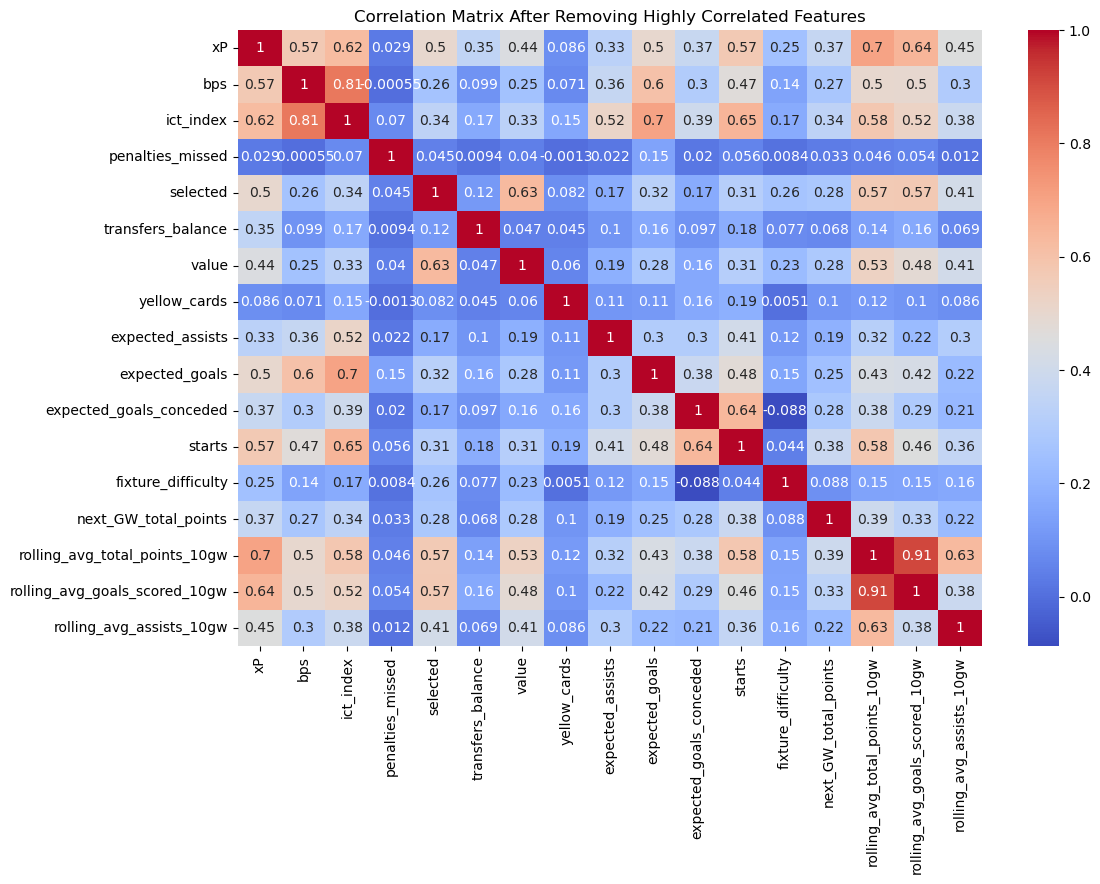

In [23]:
# Step 3: Check the correlation matrix again to see if there are any remaining highly correlated features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()

In [124]:
df_fwd_cleaned.to_csv('df_fwd_cleaned.csv', index=False)


In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features and target
X_fwd = df_fwd_cleaned.drop(columns=['next_GW_total_points'])  # Features
y_fwd = df_fwd_cleaned['next_GW_total_points']  # Target (Total Points)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_fwd_scaled = scaler.fit_transform(X_fwd.select_dtypes(include=[float, int]))

# Create a DataFrame for scaled features
df_fwd_scaled = pd.DataFrame(X_fwd_scaled, columns=X_fwd.select_dtypes(include=[float, int]).columns)

# Check the scaled data
print(df_fwd_scaled.head())

         xP       bps  ict_index  penalties_missed  selected  \
0 -0.093969  1.354099   1.065570         -0.056124 -0.385734   
1  0.561284 -0.507057   0.335949         -0.056124 -0.307089   
2  1.062359  0.578617   1.136178         -0.056124 -0.219398   
3  0.175841 -0.041768   0.147660         -0.056124 -0.219642   
4 -0.093969 -0.041768   1.395076         -0.056124 -0.240359   

   transfers_balance     value  yellow_cards  expected_assists  \
0          -0.039259 -0.159625     -0.262496          0.341310   
1           0.377203 -0.159625     -0.262496          0.932084   
2           0.680245 -0.159625     -0.262496          0.386256   
3          -0.093864 -0.159625     -0.262496         -0.252181   
4          -0.247141 -0.159625     -0.262496          0.861191   

   expected_goals  expected_goals_conceded    starts  fixture_difficulty  \
0        0.982912                 1.754442  1.231178           -0.002861   
1        0.157760                -0.129748  1.231178           -0.

In [25]:
print(df_fwd_scaled.columns)

Index(['xP', 'bps', 'ict_index', 'penalties_missed', 'selected',
       'transfers_balance', 'value', 'yellow_cards', 'expected_assists',
       'expected_goals', 'expected_goals_conceded', 'starts',
       'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw'],
      dtype='object')


In [26]:
# Add missing columns back to the scaled dataframe from the original cleaned dataframe
df_fwd_scaled['name'] = df_fwd_cleaned['name']
df_fwd_scaled['team'] = df_fwd_cleaned['team']
df_fwd_scaled['season'] = df_fwd_cleaned['season']
df_fwd_scaled['kickoff_time'] = df_fwd_cleaned['kickoff_time']
df_fwd_scaled['next_GW_total_points'] = df_fwd_cleaned['next_GW_total_points']
df_fwd_scaled['GW'] = df_fwd_cleaned['GW']



# Check the updated columns to ensure everything is back
print(df_fwd_scaled.columns)

Index(['xP', 'bps', 'ict_index', 'penalties_missed', 'selected',
       'transfers_balance', 'value', 'yellow_cards', 'expected_assists',
       'expected_goals', 'expected_goals_conceded', 'starts',
       'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw', 'name',
       'team', 'season', 'kickoff_time', 'next_GW_total_points', 'GW'],
      dtype='object')


In [27]:
# Sort the data by kickoff_time to ensure time order
df_fwd_final = df_fwd_scaled.sort_values(by='kickoff_time')

# Use 70% of the data for training and 30% for testing
train_size = int(0.7 * len(df_fwd_final))

# Split the data into training and test sets
train_data = df_fwd_final[:train_size]
test_data = df_fwd_final[train_size:]

# Check the split
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 3789
Test set size: 1625


In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['xP', 'bps', 'ict_index', 'penalties_missed', 'selected',
       'transfers_balance', 'value', 'yellow_cards', 'expected_assists',
       'expected_goals', 'expected_goals_conceded', 'starts',
       'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.7347238363493926
MAE: 1.6705963656304477


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - RMSE: 2.7347238363493926, MAE: 1.6705963656304477
Random Forest - RMSE: 2.711853514515125, MAE: 1.7402958974358973
Gradient Boosting - RMSE: 2.7667938976018993, MAE: 1.678246633036134
Ridge Regression - RMSE: 2.5995462115136516, MAE: 1.5843795601955215
ElasticNet - RMSE: 2.7493387424297695, MAE: 1.8987989961466705
SVR - RMSE: 2.7258502201473904, MAE: 1.3148210133492182
KNeighbors - RMSE: 2.7516216197837844, MAE: 1.6089846153846152
Neural Network (MLP) - RMSE: 3.829147919530919, MAE: 2.3851881254661254


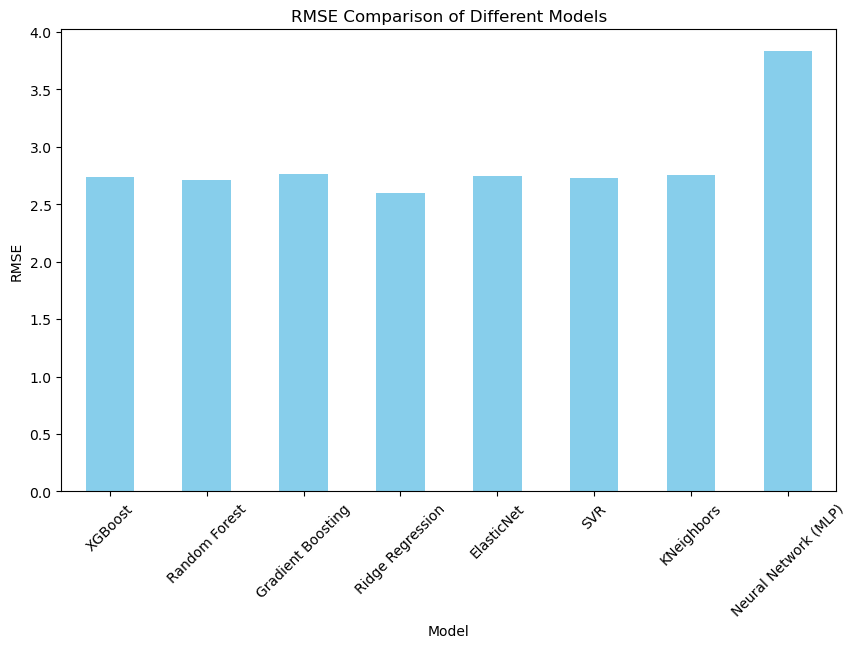

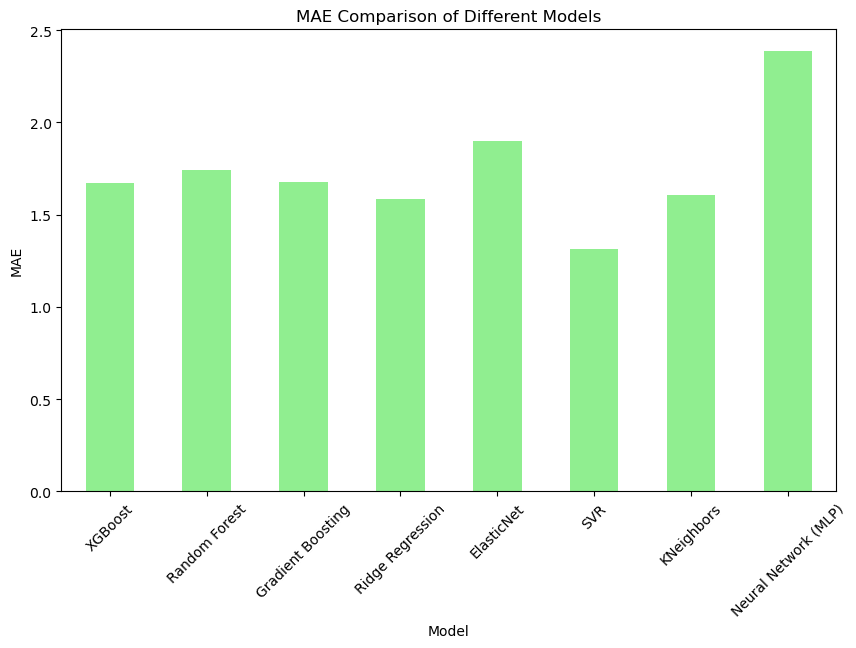

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define features and target
features = ['xP', 'bps', 'ict_index', 'penalties_missed', 'selected',
       'transfers_balance', 'value', 'yellow_cards', 'expected_assists',
       'expected_goals', 'expected_goals_conceded', 'starts',
       'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize and evaluate each model
models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Ridge Regression": Ridge(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Dictionary to store RMSE and MAE for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}")

# Convert the results into a DataFrame for easy visualization
results_df = pd.DataFrame(results).T

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison of Different Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
results_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('MAE Comparison of Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 1.0), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 10), ('n_estimators', 100), ('reg_alpha', 0), ('reg_lambda', 0.1), ('subsample', 0.5)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 10), ('n_estimators', 1000), ('reg_alpha', 10), ('reg_lambda', 3.8054463521349127), ('subsample', 1.0)])
Combined Model Test RMSE: 1.4114639343953133
                                  next_GW_total_points  Predicted
name                                                             
erling haaland                                5.225806   5.056671
ollie watkins                                 5.062500   4.858086
jean philippe mateta                          4.774194   4.138552
alexander isak                                4.354839   4.532729
nicolas jackson                               4.2

C:\Users\syeds\AppData\Local\Temp\ipykernel_27708\3109002461.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),


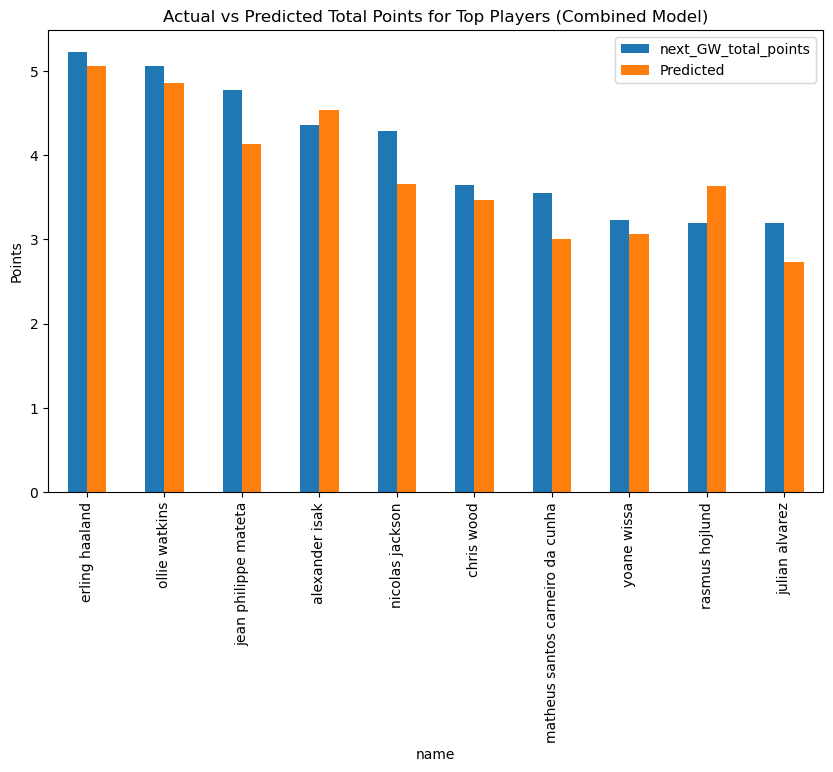

In [107]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])

# Define a threshold to split players into high and low scorers (e.g., threshold = 7)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 1.0), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 10), ('n_estimators', 100), ('reg_alpha', 0), ('reg_lambda', 0.1), ('subsample', 0.5)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 10), ('n_estimators', 1000), ('reg_alpha', 10), ('reg_lambda', 3.8054463521349127), ('subsample', 1.0)])


C:\Users\syeds\AppData\Local\Temp\ipykernel_47296\2551166615.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),


Combined Model Test RMSE: 1.4114639343953133
High Scorers Cross-Validation RMSE scores: [3.03618068 2.26157934 3.58749683 2.8818129  3.31754628]
Average High Scorers Cross-Validation RMSE: 3.01692320515133
Low Scorers Cross-Validation RMSE scores: [1.20479615 1.08370151 1.19399888 0.96297763 1.08310939]
Average Low Scorers Cross-Validation RMSE: 1.1057167093189302
Mean Absolute Error (MAE): 2.4308809393231687
R-squared: -0.7809796333312988
                                  next_GW_total_points  Predicted
name                                                             
erling haaland                                5.225806   5.056671
ollie watkins                                 5.062500   4.858086
jean philippe mateta                          4.774194   4.138552
alexander isak                                4.354839   4.532729
nicolas jackson                               4.290323   3.663055
chris wood                                    3.645161   3.466807
matheus santos carneiro da c

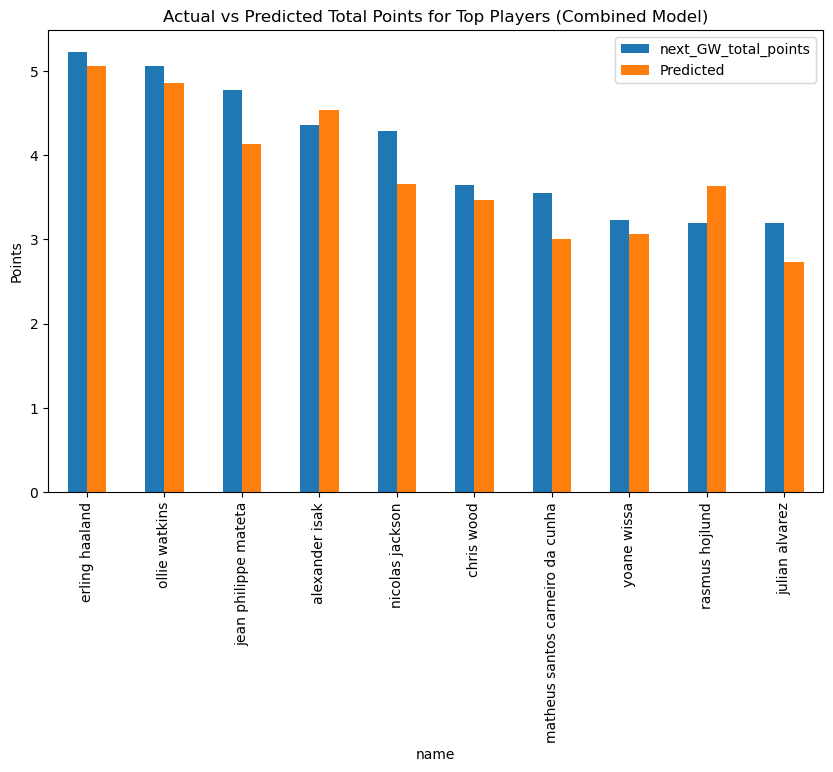

In [29]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])

# Define a threshold to split players into high and low scorers (e.g., threshold = 6)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

# Cross-Validation Scores for high scorers model (5-fold cross-validation)
cv_scores_high = cross_val_score(best_xgb_high, X_train_high, y_train_high, cv=5, scoring='neg_root_mean_squared_error')
print(f"High Scorers Cross-Validation RMSE scores: {-cv_scores_high}")
print(f"Average High Scorers Cross-Validation RMSE: {-cv_scores_high.mean()}")

# Cross-Validation Scores for low scorers model (5-fold cross-validation)
cv_scores_low = cross_val_score(best_xgb_low, X_train_low, y_train_low, cv=5, scoring='neg_root_mean_squared_error')
print(f"Low Scorers Cross-Validation RMSE scores: {-cv_scores_low}")
print(f"Average Low Scorers Cross-Validation RMSE: {-cv_scores_low.mean()}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_combined, y_pred_combined)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared
r2 = r2_score(y_test_combined, y_pred_combined)
print(f'R-squared: {r2}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

In [109]:
import joblib

In [110]:
# Save the trained models using joblib
joblib.dump(best_xgb_high, 'fwd_xgb_high_model.pkl')
joblib.dump(best_xgb_low, 'fwd_xgb_low_model.pkl')

['fwd_xgb_low_model.pkl']

In [112]:
# Load the saved models
best_xgb_high = joblib.load('fwd_xgb_high_model.pkl')
best_xgb_low = joblib.load('fwd_xgb_low_model.pkl')

# Load the DataFrame with predictions
test_data_with_predictions = pd.read_pickle('test_data_with_predictions.pkl')

# Display the DataFrame
print(test_data_with_predictions.head())

FileNotFoundError: [Errno 2] No such file or directory: 'test_data_with_predictions.pkl'

                                  next_GW_total_points   Predicted
name                                                              
ollie watkins                                      162  155.458755
erling haaland                                     162  156.756805
jean philippe mateta                               148  128.295105
alexander isak                                     135  140.514587
nicolas jackson                                    133  113.554710
chris wood                                         113  107.471031
matheus santos carneiro da cunha                   110   93.111885
yoane wissa                                        100   95.005463
rasmus hojlund                                      99  112.577858
julian alvarez                                      99   84.760147


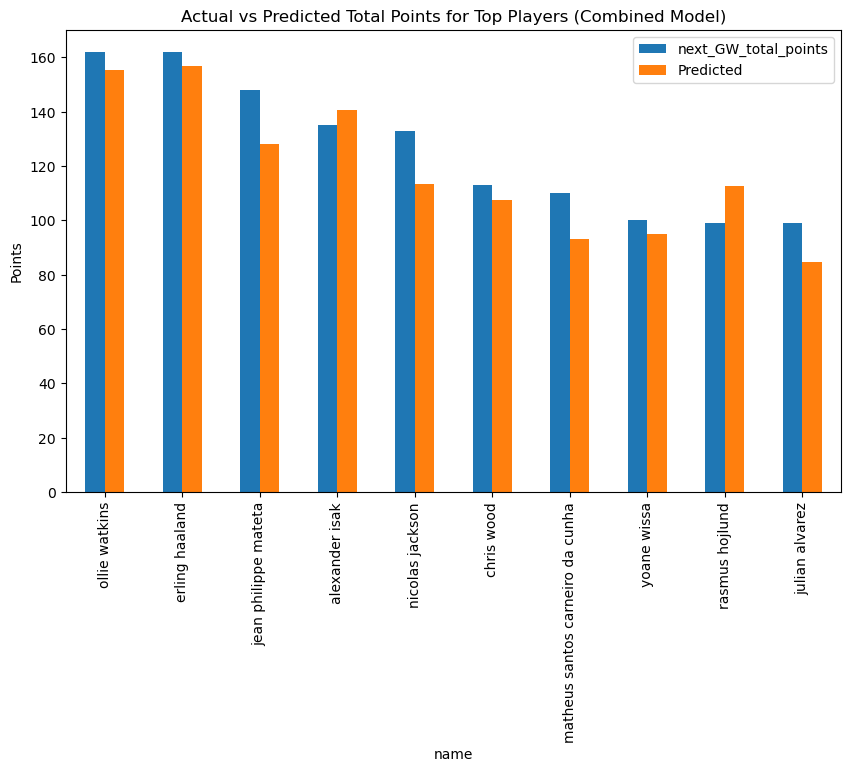

In [79]:
# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'sum', 'Predicted': 'sum'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

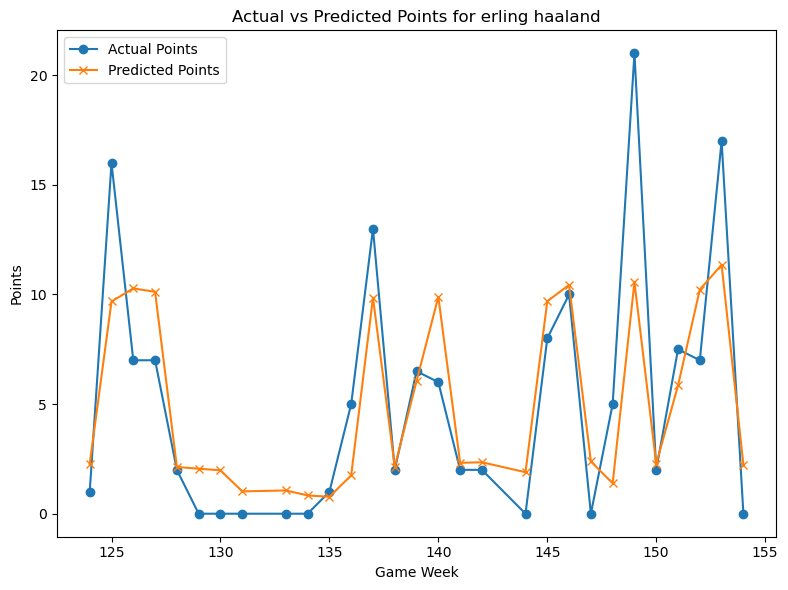

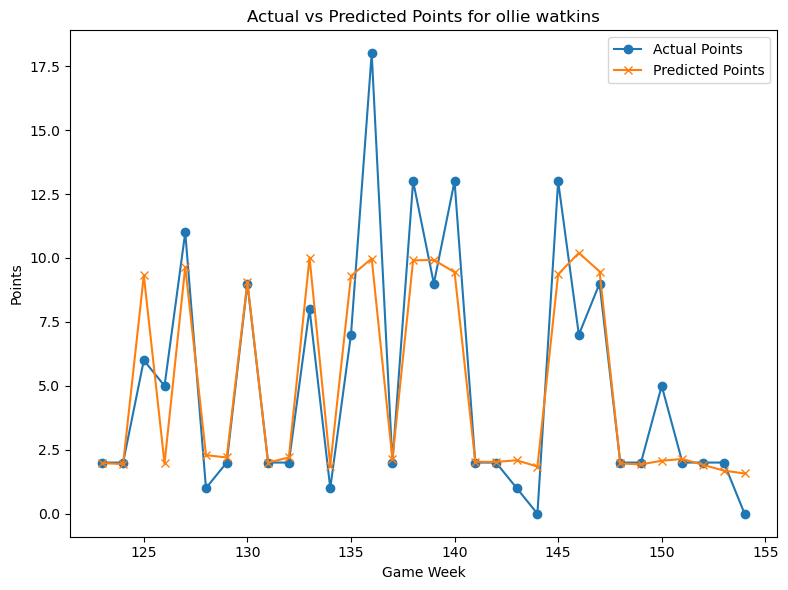

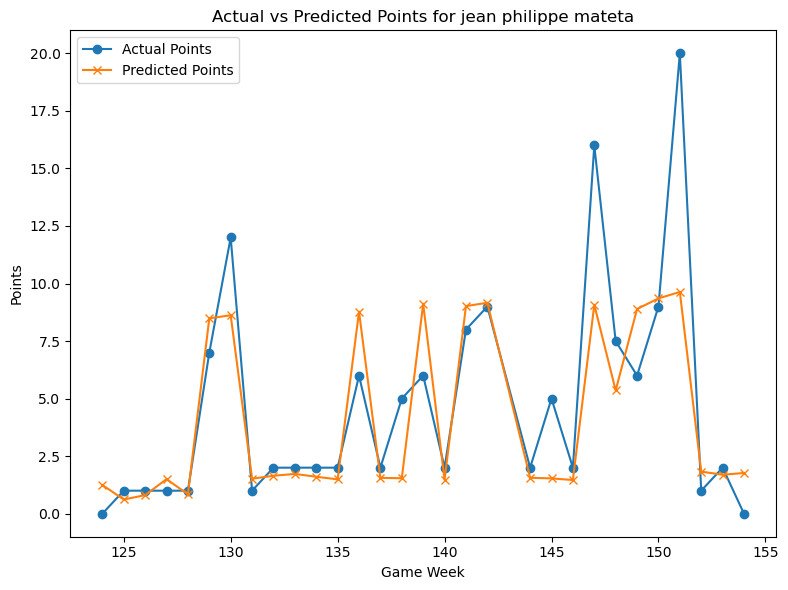

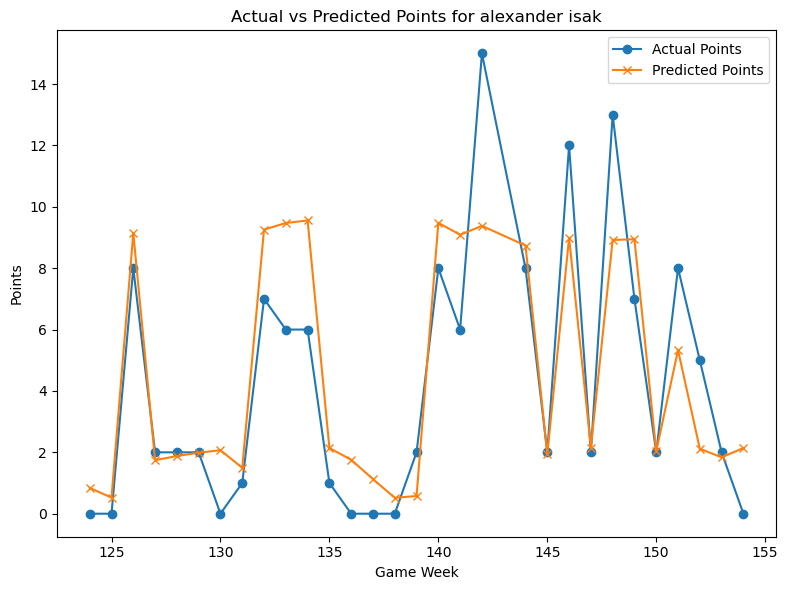

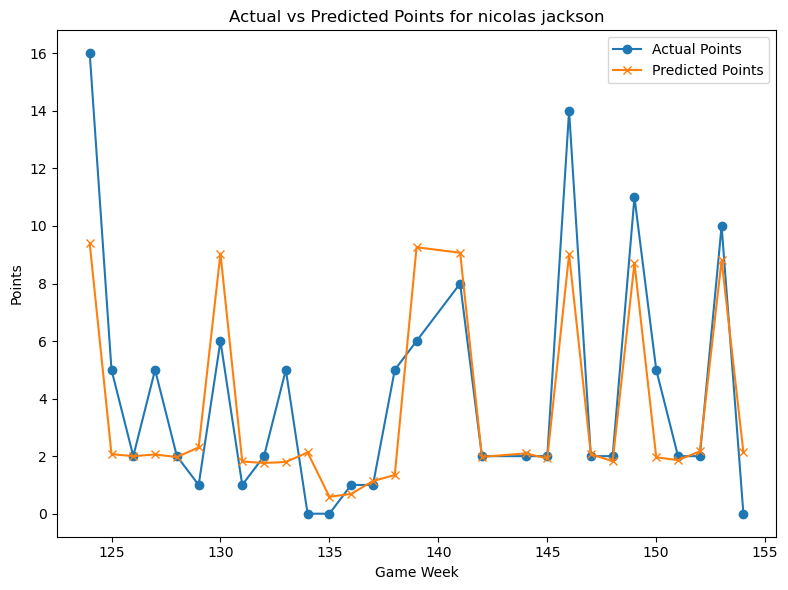

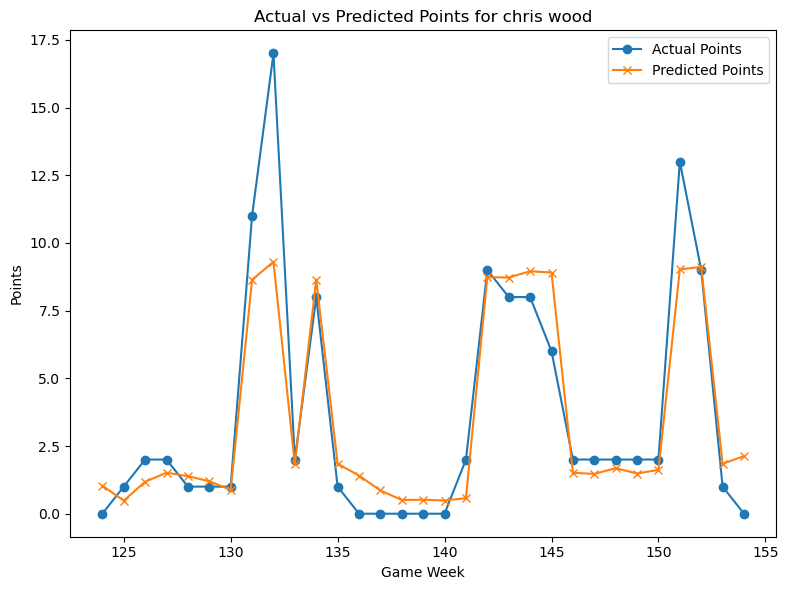

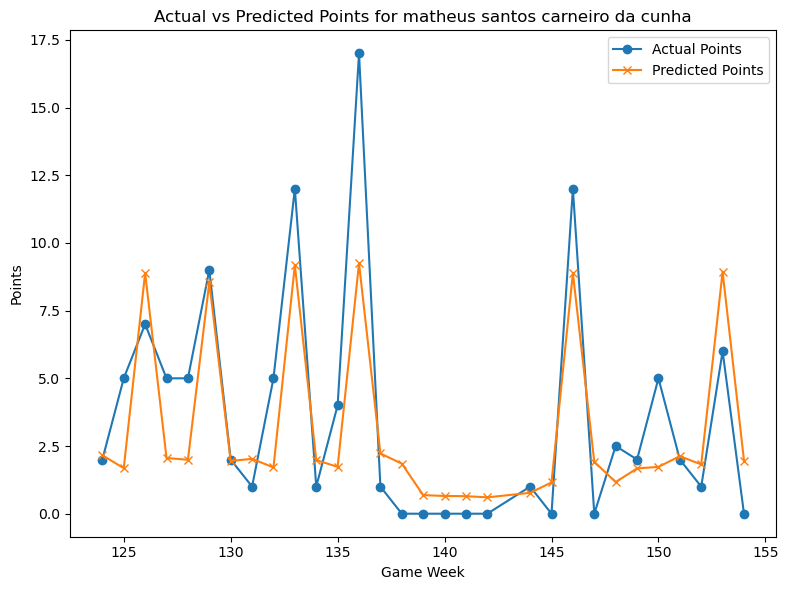

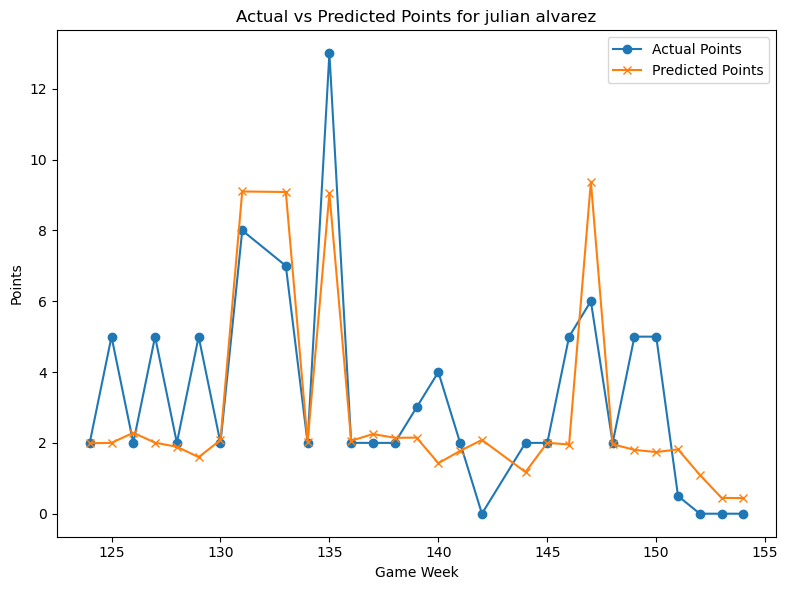

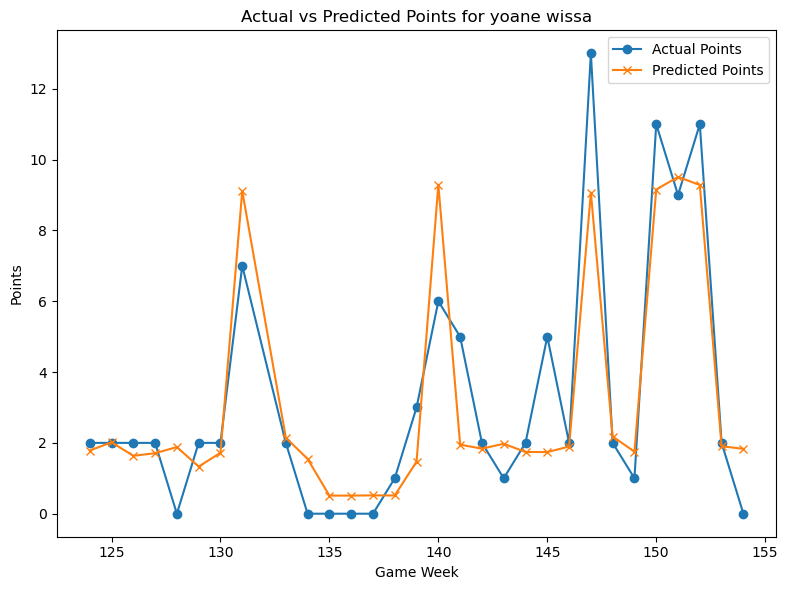

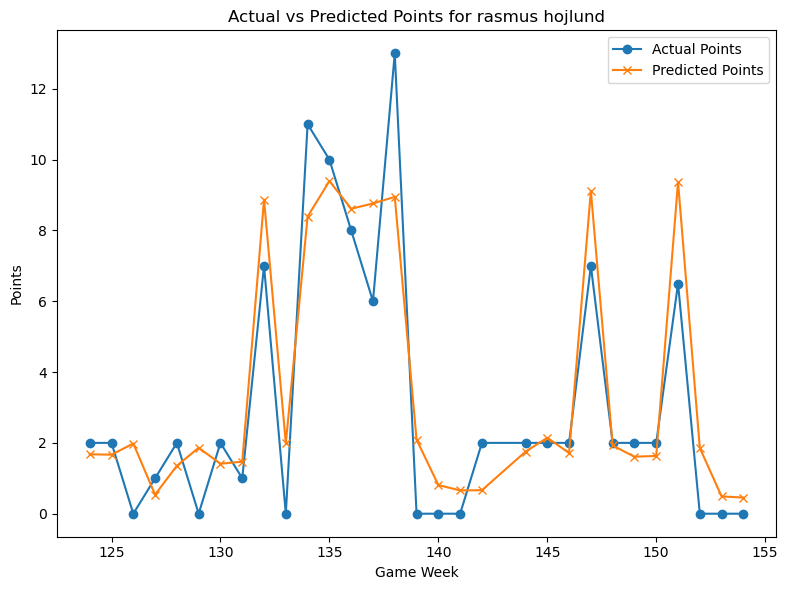

In [84]:
import matplotlib.pyplot as plt

# Group by game week and player, then calculate the average actual and predicted points
gw_performance = test_data.groupby(['GW', 'name']).agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).reset_index()

# Get the top players by their actual total points
top_players_gws = gw_performance.groupby('name').agg({'next_GW_total_points': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10).index

# Filter the performance for these top players
top_gw_performance = gw_performance[gw_performance['name'].isin(top_players_gws)]

# Create a separate plot for each player
for player in top_players_gws:
    player_data = top_gw_performance[top_gw_performance['name'] == player]
    plt.figure(figsize=(8, 6))
    plt.plot(player_data['GW'], player_data['next_GW_total_points'], label=f'Actual Points', marker='o')
    plt.plot(player_data['GW'], player_data['Predicted'], label=f'Predicted Points', marker='x')
    plt.title(f'Actual vs Predicted Points for {player}')
    plt.xlabel('Game Week')
    plt.ylabel('Points')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\syeds\AppData\Local\Temp\ipykernel_47296\861978358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']


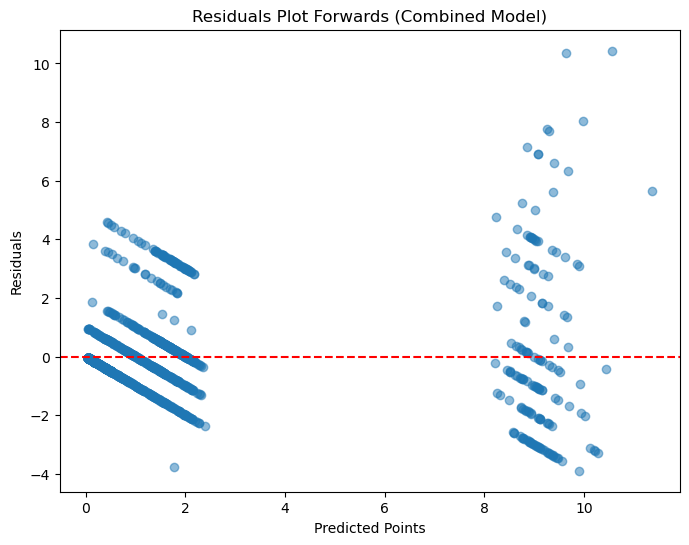

In [30]:
# Calculate residuals (actual - predicted)
test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Predicted'], test_data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot Forwards (Combined Model)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

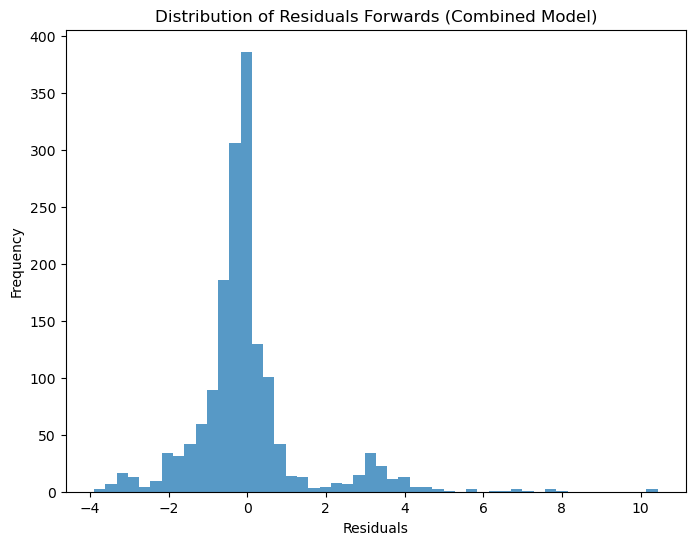

In [31]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(test_data['Residuals'], bins=50, alpha=0.75)
plt.title('Distribution of Residuals Forwards (Combined Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

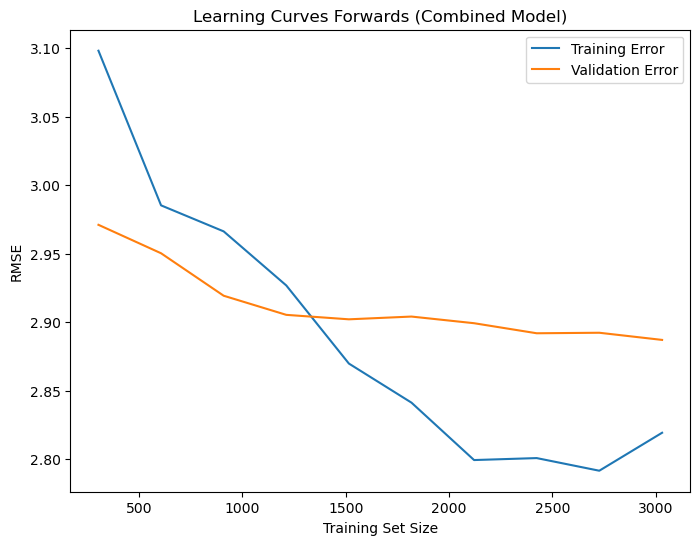

In [32]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the best_xgb model (assumes that best_params_high or best_params_low is already defined)
best_xgb = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)

# Train the model with all training data (if not done already)
best_xgb.fit(X_train, y_train)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training Error')
plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation Error')
plt.title('Learning Curves Forwards (Combined Model)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

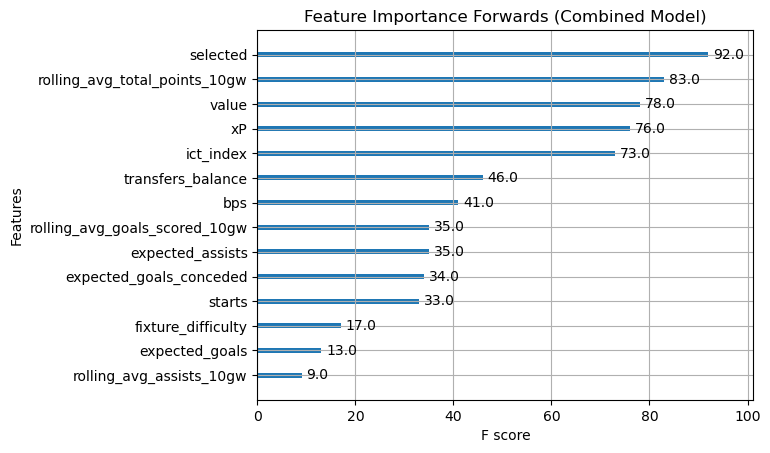

Cross-Validation RMSE scores: [3.30726443 2.60700835 2.94170973 2.54236464 2.97084323]
Average Cross-Validation RMSE: 2.873838076881261
Mean Absolute Error (MAE): 1.6705963656304477
R-squared: 0.15694910287857056


In [33]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb)
plt.title('Feature Importance Forwards (Combined Model)')
plt.show()

# 2. Cross-Validation Scores (5-fold cross-validation)
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE scores: {-cv_scores}")
print(f"Average Cross-Validation RMSE: {-cv_scores.mean()}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 4. R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

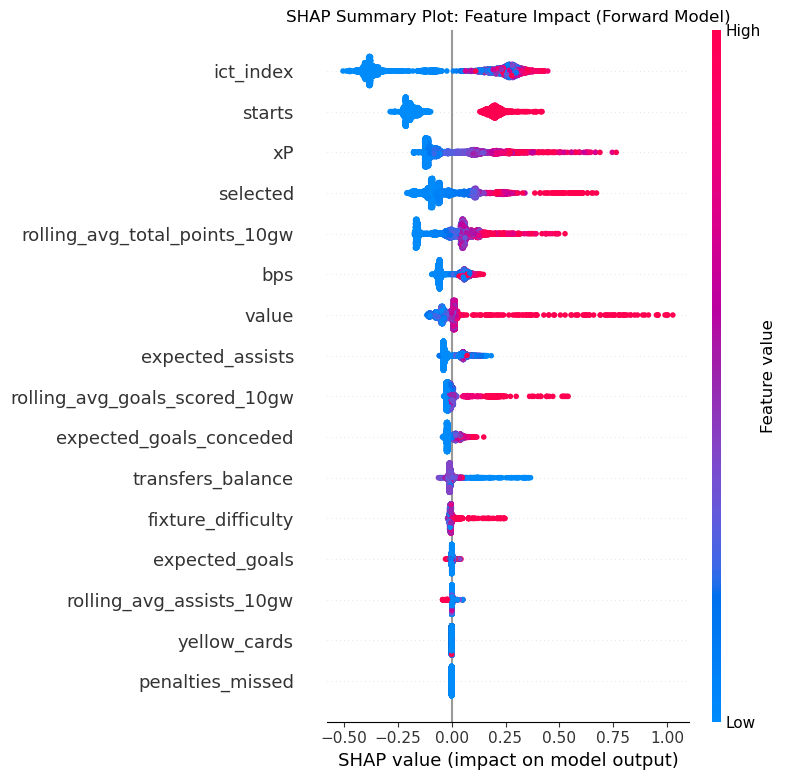

In [34]:
import shap

# Create a TreeExplainer for your XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the same dataset (X_train) you're using
shap_values = explainer.shap_values(X_train)

# Generate SHAP dot plot (beeswarm plot)
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)

# Customize and display the plot
plt.title("SHAP Summary Plot: Feature Impact (Forward Model)")
plt.tight_layout()
plt.show()

In [69]:
import joblib

# Save the combined model to a file locally
model_filename = 'best_xgboost_FWDmodel.pkl'
joblib.dump(best_xgb, model_filename)

['best_xgboost_FWDmodel.pkl']

In [116]:
# Alternatively, save them as CSV files
train_data.to_csv('fwd_train_data.csv', index=False)
test_data.to_csv('fwd_test_data.csv', index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


In [35]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/gw_153_predictions.csv'
data = pd.read_csv(file_path)

# Filter the data for GW 115 to 119
gw_data = data[data['GW'].between(115, 119)]

# Gurobi Model for FPL Optimization with 5 GW Lookahead
def fpl_optimizer_multi_gw(gw_data, budget_limit=100, max_team_players=3, formation="1-3-4-3", lookahead_gws=5):
    
    # Initialize model
    model = gp.Model("FPL_Optimizer_Multi_GW")
    
    # Set formations
    formations = {
        "1-3-4-3": {"GK": 1, "DEF": 3, "MID": 4, "FWD": 3},
        "1-4-4-2": {"GK": 1, "DEF": 4, "MID": 4, "FWD": 2},
        "1-3-5-2": {"GK": 1, "DEF": 3, "MID": 5, "FWD": 2}
    }
    bench_formations = {
        "1-3-4-3": {"GK": 1, "DEF": 2, "MID": 1, "FWD": 0},
        "1-4-4-2": {"GK": 1, "DEF": 1, "MID": 1, "FWD": 1},
        "1-3-5-2": {"GK": 1, "DEF": 2, "MID": 0, "FWD": 1}
    }
    
    required_positions = formations[formation]
    bench_positions = bench_formations[formation]
    
    # Prepare data for each player by summing predicted points over 5 GWs
    gw_data['unique_player_id'] = gw_data['name'] + '_' + gw_data['team']
    
    player_summed_data = (
        gw_data.groupby('unique_player_id')
               .agg({'Predicted_Points': 'sum', 'value': 'first', 'position': 'first', 'team': 'first'})
    )
    
    players = player_summed_data.index.tolist()
    predicted_points = dict(zip(players, player_summed_data['Predicted_Points']))
    values = dict(zip(players, player_summed_data['value']))
    positions = dict(zip(players, player_summed_data['position']))
    teams = dict(zip(players, player_summed_data['team']))
    
    # Create decision variables
    x = model.addVars(players, vtype=GRB.BINARY, name="x")  # Decision variables (1 if selected, 0 otherwise)
    
    # Objective: Maximize total predicted points over 5 GWs
    model.setObjective(gp.quicksum(x[player] * predicted_points[player] for player in players), GRB.MAXIMIZE)
    
    # Constraint: Total value of selected players must be within the budget
    model.addConstr(gp.quicksum(x[player] * values[player] for player in players) <= budget_limit, name="Budget")
    
    # Constraints: Number of players by position in the starting 11
    for pos, count in required_positions.items():
        model.addConstr(gp.quicksum(x[player] for player in players if positions[player] == pos) == count, name=f"{pos}_constraint")
    
    # Constraints: Number of players by position on the bench
    total_bench_players = 4
    for pos, count in bench_positions.items():
        model.addConstr(gp.quicksum(x[player] for player in players if positions[player] == pos) >= count, name=f"{pos}_bench_constraint")
    
    # Constraint: Max 3 players per team
    for team in player_summed_data['team'].unique():
        model.addConstr(gp.quicksum(x[player] for player in players if teams[player] == team) <= max_team_players, name=f"{team}_limit")
    
    # Solve the model
    model.optimize()
    
    # Get the results
    selected_players = [player for player in players if x[player].x > 0.5]
    
    # Prepare the final squad for output
    starting_11 = []
    bench = []
    
    # Select starting 11 and bench based on constraints
    for pos, count in required_positions.items():
        pos_players = [p for p in selected_players if positions[p] == pos]
        starting_11.extend(pos_players[:count])
        bench.extend(pos_players[count:])
    
    # Sort the remaining players for the bench based on budget and predicted points
    remaining_data = player_summed_data[~player_summed_data.index.isin(starting_11)]
    
    # Fill bench with the best possible low-cost players while keeping within the budget
    for pos, count in bench_positions.items():
        pos_bench_players = remaining_data[remaining_data['position'] == pos].sort_values(by='value', ascending=True)
        for player in pos_bench_players.index:
            if len([p for p in bench if positions[p] == pos]) < count:
                bench.append(player)
    
    return starting_11, bench, model.ObjVal  # Return starting 11, bench, and the optimized points

# Call the optimizer function
starting_11, bench, total_predicted_points = fpl_optimizer_multi_gw(gw_data)

# Output results
print("Selected Starting 11 FPL Team for 5 GWs:")
for player in starting_11:
    player_data = gw_data[gw_data['unique_player_id'] == player].iloc[0]
    print(f"{player_data['name']} ({player_data['team']}, {player_data['position']}): Total Predicted Points (5 GWs): {player_data['Predicted_Points']}, Value: {player_data['value']}")
    
print("\nBench players:")
for player in bench:
    player_data = gw_data[gw_data['unique_player_id'] == player].iloc[0]
    print(f"{player_data['name']} ({player_data['team']}, {player_data['position']}): Total Predicted Points (5 GWs): {player_data['Predicted_Points']}, Value: {player_data['value']}")
    
print(f"\nTotal Predicted Points for Starting 11 and Bench over 5 GWs: {total_predicted_points}")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-11400H @ 2.70GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 32 rows, 457 columns and 1828 nonzeros
Model fingerprint: 0x52b56728
Variable types: 0 continuous, 457 integer (457 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [5e-03, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 42.3946376
Presolve removed 8 rows and 13 columns
Presolve time: 0.02s
Presolved: 24 rows, 444 columns, 1315 nonzeros
Found heuristic solution: objective 275.3154792
Variable types: 0 continuous, 444 integer (444 binary)
Found heuristic solution: objective 290.1652341

Root relaxation: cutoff, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds

C:\Users\syeds\AppData\Local\Temp\ipykernel_47296\4280630262.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw_data['unique_player_id'] = gw_data['name'] + '_' + gw_data['team']
